In [10]:
import csv
import os
import pandas as pd 
import random
import numpy as np
from datetime import datetime
from dateutil.parser import parse

In [11]:
train = pd.read_csv("train.csv",nrows = 100_000)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [12]:
train.shape

(100000, 8)

In [13]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [14]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [15]:
#check the target column
train['fare_amount'].describe()

count    100000.000000
mean         11.354652
std           9.716777
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64

In [16]:
#Converting pickup_datetime column and extracting year,month,date,hour,weekday features from pickup_datetime

train.columns = ['key', 'fare_amount' , 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude' ,\
                 'dropoff_latitude', 'passenger_count']
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], infer_datetime_format=False)
train['year'] = train.pickup_datetime.apply(lambda t: t.year)
train['month'] = train.pickup_datetime.apply(lambda t: t.month)
train['date'] = train.pickup_datetime.apply(lambda t: t.day)
train['hour'] = train.pickup_datetime.apply(lambda t: t.hour)
train['weekday'] = train.pickup_datetime.apply(lambda t: t.weekday())
train = train.round({'pickup_latitude': 3, 'pickup_longitude': 3, 'dropoff_latitude': 3, 'dropoff_longitude': 3})

In [17]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,hour,weekday
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,15,17,0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,5,16,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,18,0,3
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,21,4,5
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,9,7,1


In [19]:
test = pd.read_csv("test.csv")
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [20]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], infer_datetime_format=False)
test['year'] = test.pickup_datetime.apply(lambda t: t.year)
test['month'] = test.pickup_datetime.apply(lambda t: t.month)
test['date'] = test.pickup_datetime.apply(lambda t: t.day)
test['hour'] = test.pickup_datetime.apply(lambda t: t.hour)
test['weekday'] = test.pickup_datetime.apply(lambda t: t.weekday())
test = test.round({'pickup_latitude': 3, 'pickup_longitude': 3, 'dropoff_latitude': 3, 'dropoff_longitude': 3})
test.head()
print(len(test))

9914


In [21]:
#finding the boundary of the New York city
latitude = test["pickup_latitude"].tolist()
latitude.extend(test["dropoff_latitude"].tolist())
longitude = test["pickup_longitude"].tolist()
longitude.extend(test["dropoff_longitude"].tolist())
min_lat = round(min(latitude), 3)
max_lat = round(max(latitude), 3)
min_long = round(min(longitude), 3)
max_long = round(max(longitude), 3)
print(min_lat, max_lat)
print(min_long, max_long)

train = train.drop(train[(train.fare_amount <= 0) | (train.fare_amount >= 250) | (train.passenger_count == 0) | \
                        (train.pickup_longitude >= max_long) | (train.pickup_longitude <= min_long) | \
                        (train.dropoff_longitude >= max_long) | (train.dropoff_longitude <= min_long) | \
                        (train.pickup_latitude >= max_lat) | (train.pickup_latitude <= min_lat) | \
                        (train.dropoff_latitude >= max_lat) | (train.dropoff_latitude <= min_lat)].index)

print(len(train))

40.569 41.71
-74.263 -72.987
97479


In [22]:
from geopy import distance
import numpy as np
pickup_lat = train['pickup_latitude']
pickup_long = train['pickup_longitude']
dropoff_lat = train['dropoff_latitude']
dropoff_long = train['dropoff_longitude']

# Calculating Euclidean Distance for the training data
distances = []
length_train = len(train)
for i in range(length_train):
    pickup = (train.iloc[i]['pickup_latitude'], train.iloc[i]['pickup_longitude'])
    dropoff = (train.iloc[i]['dropoff_latitude'], train.iloc[i]['dropoff_longitude'])
    distances.append(round(distance.distance(pickup,dropoff).miles, 3))
distance_column = pd.Series(distances)
train.reset_index(drop=True, inplace=True)
distance_column.reset_index(drop=True, inplace=True)
train['distance'] = distance_column
i = 0
while i < len(train):
    if train.iloc[i]['distance'] == 0:
        train = train.drop(train.index[i])
    else:
        i += 1
print(train.head())

# # Calculating Euclidean Distance for the testing data
distances = []
length_test = len(test)
for i in range(length_test):
    pickup = (test.iloc[i]['pickup_latitude'], test.iloc[i]['pickup_longitude'])
    dropoff = (test.iloc[i]['dropoff_latitude'], test.iloc[i]['dropoff_longitude'])
    distances.append(round(distance.distance(pickup,dropoff).miles, 3))
distance_column = pd.Series(distances)
test.reset_index(drop=True, inplace=True)
distance_column.reset_index(drop=True, inplace=True)
test['distance'] = distance_column
print(test.head())

                             key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.844           40.721            -73.842            40.712   
1           -74.016           40.711            -73.979            40.782   
2           -73.983           40.761            -73.991            40.751   
3           -73.987           40.733            -73.992            40.758   
4           -73.968           40.768            -73.957            40.784   

   passenger_count  year  month  date  hour  weekday  distance  
0                1  2

r =  0.8379613571219324
p-value =  0.0
r^2 =  0.7021792360296307


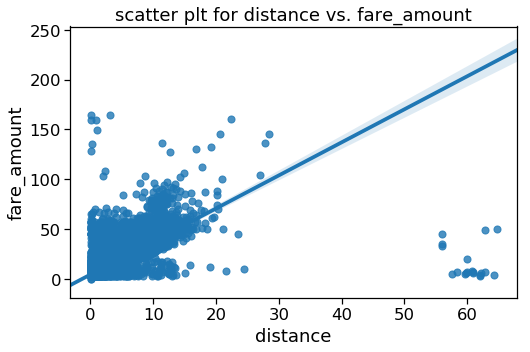

r =  -0.030940691302076453
p-value =  8.86050950854965e-22
r^2 =  0.0009573263782503895


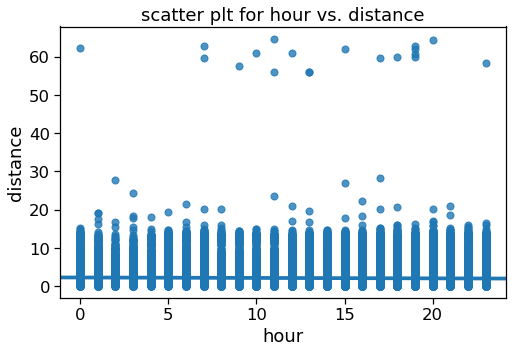

r =  -0.0200368445884365
p-value =  5.328223520940249e-10
r^2 =  0.000401475141061157


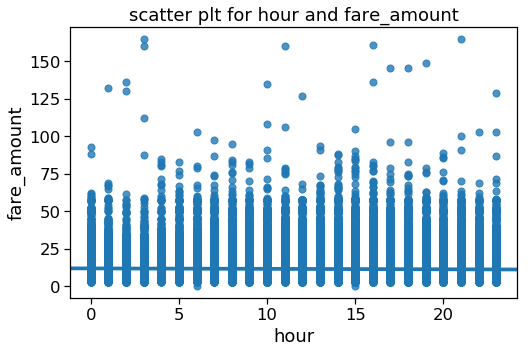

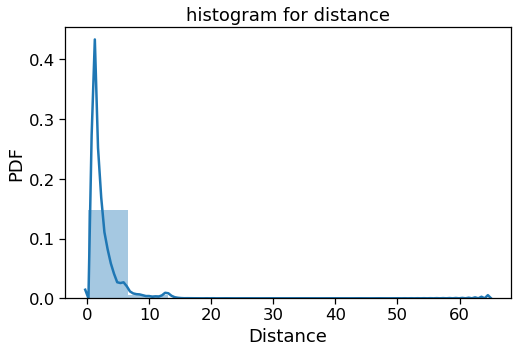

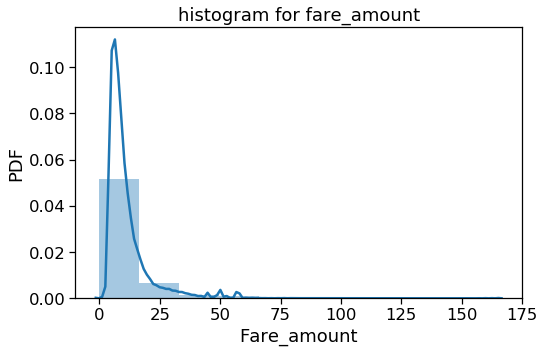

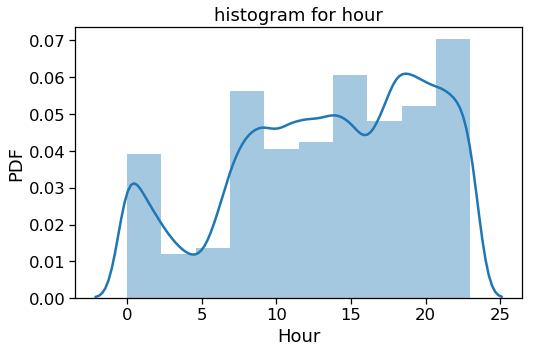

In [24]:
from scipy.stats import pearsonr
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

#Pearson correlation between distance and taxi fare
r, p_value = pearsonr(train['distance'], train['fare_amount'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['distance'], y=train['fare_amount'], scatter_kws={"s": 50})
ax.set_title("scatter plt for distance vs. fare_amount")
fig.savefig('pearson_distance_fare.png', bbox_inches='tight')
plt.show()

#Pearson correlation between time and distance
r, p_value = pearsonr(train['hour'], train['distance'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['hour'], y=train['distance'], scatter_kws={"s": 50})
ax.set_title("scatter plt for hour vs. distance")
fig.savefig('pearson_hour_distance.png', bbox_inches='tight')
plt.show()

#Pearson correlation between time and taxi fare
r, p_value = pearsonr(train['hour'], train['fare_amount'])
print('r = ', r)
print('p-value = ',p_value)
print('r^2 = ', r*r)
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.regplot(x=train['hour'], y=train['fare_amount'], scatter_kws={"s": 50})
ax.set_title("scatter plt for hour and fare_amount")
fig.savefig('pearson_hour_fare.png', bbox_inches='tight')
plt.show()

#histogram of disatnce
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['distance'], bins=10)
ax.set_title("histogram for distance")
ax.set(xlabel='Distance', ylabel='PDF')
fig.savefig('hist_distance.png', bbox_inches='tight')
plt.show()

#histogram of fare_amount
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['fare_amount'], bins=10)
ax.set_title("histogram for fare_amount")
ax.set(xlabel='Fare_amount', ylabel='PDF')
fig.savefig('hist_fare.png', bbox_inches='tight')
plt.show()

#histogram of hour
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.distplot(train['hour'], bins=10)
ax.set_title("histogram for hour")
ax.set(xlabel='Hour', ylabel='PDF')
fig.savefig('hist_hour.png', bbox_inches='tight')
plt.show()

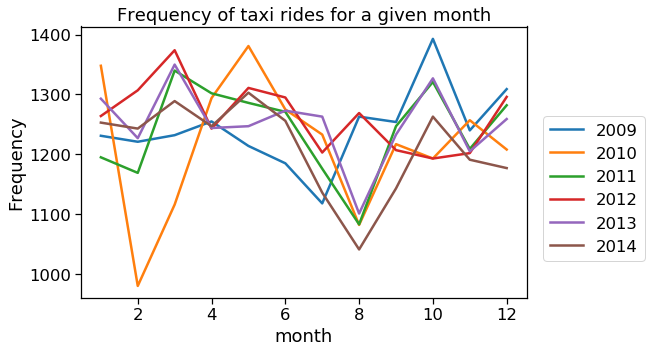

In [25]:
import math
traffic = {}
i = 0
length_train = len(train)
while i < 24:
    traffic[i] = 0
    i = i + 1
for i in range(length_train):
    key = train.iloc[i]['hour']
    traffic[key] += 1
    
fig, ax = plt.subplots(figsize=(8,5))


#We have not taken year 2015 into calculation as it does not have data for the months.
year_list1 = [2009, 2010, 2011, 2012, 2013, 2014]
monthwise = {}
for i in year_list1:
    monthwise[i] = {}
    for j in range(1, 13, 1):
        monthwise[i][j] = 0
for i in range(length_train):
    if train.iloc[i]['year'] == 2015:
        continue
    monthwise[train.iloc[i]['year']][train.iloc[i]['month']] += 1
for i in monthwise.keys():
    plt.plot(list(monthwise[i].keys()),list(monthwise[i].values()), label = i)
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.7))
plt.ylabel('Frequency')
plt.xlabel('month')
plt.title('Frequency of taxi rides for a given month')
fig.savefig('freq_month_label_year.png', bbox_inches='tight')
plt.show()

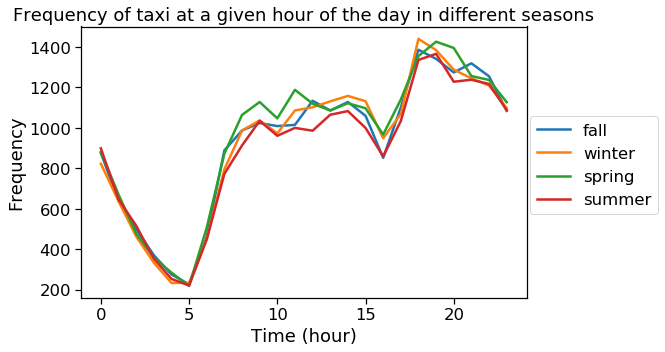

In [26]:
#calculating frequencies of the taxi rides for a given time of a day in a given season
traffic_season = {}
# mapping months to the respective seasons
fall = [9, 10, 11]
winter = [12, 1 , 2]
spring = [3, 4, 5]
summer = [6, 7, 8]
season = ['fall', 'winter', 'spring', 'summer']
i = 0
j = 0
while i < 4:
    traffic_season[i] = {}
    j = 0
    while j < 24:
        traffic_season[i][j] = 0
        j += 1
    i += 1
for i in range(len(train)):
    if train.iloc[i]['year'] == 2015:
        continue
    key1 = train.iloc[i]['month']
    if key1 in fall:
        key1 = 0
    elif key1 in winter:
        key1 = 1
    elif key1 in spring:
        key1 = 2
    else:
        key1 = 3
    key2 = train.iloc[i]['hour']
    if math.isnan(key1) or math.isnan(key2):
        print(train.iloc[i])
    traffic_season[key1][key2] += 1
    
fig, ax = plt.subplots(figsize=(8,5))
for i in traffic_season.keys():
    plt.plot(list(traffic_season[i].keys()), list(traffic_season[i].values()), label = season[i])
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.7))
plt.ylabel('Frequency')
plt.xlabel('Time (hour)')
plt.title('Frequency of taxi at a given hour of the day in different seasons')
fig.savefig('freq_hour_label_season.png', bbox_inches='tight')
plt.show()

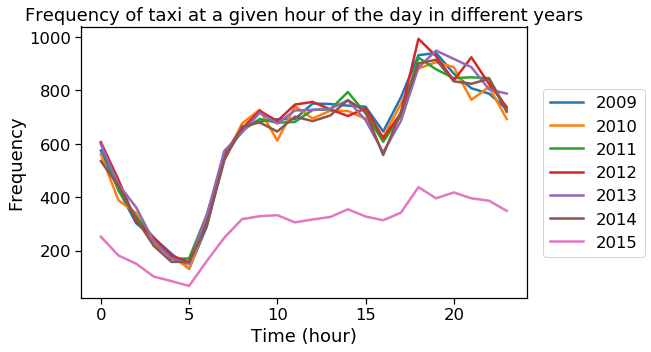

In [36]:
# Frequency of the taxi ride for a given time of a day with years
traffic_year = {}
unique_year = train['year'].unique().tolist()

for i in unique_year:
    traffic_year[i] = {}
    j = 0
    while j < 24:
        traffic_year[i][j] = 0
        j = j + 1
for i in range(length_train):
    key1 = train.iloc[i]['year']
    key2 = train.iloc[i]['hour']
    traffic_year[key1][key2] += 1

fig, ax = plt.subplots(figsize=(8,5))
for i in traffic_year.keys():
    plt.plot(list(traffic_year[i].keys()), list(traffic_year[i].values()), label = i)
#     plt.legend()
    plt.legend(loc=9, bbox_to_anchor=(1.15, 0.8))

plt.ylabel('Frequency')
plt.xlabel('Time (hour)')
plt.title('Frequency of taxi at a given hour of the day in different years')
fig.savefig('freq_hour_label_year.png', bbox_inches='tight')
plt.show()

#From the plot you can see that 2015 does not contais taxi ride infomation for the months.

In [27]:
#longitude and latitude of the airports
JFK = (40.6399257, -73.7786950)
Newark = (40.735657, -74.172363)
LGA = (40.7772500, -73.8726111)

#Airport flag is 1 if pickup or drop off location is in the vicinity of the airport.
#calclating manhattan distance for every ride in thetraining data
JFK_flag = []
Newark_flag = []
LGA_flag = []
manhattan_distances = []
for i in range(length_train):
    point1 = (train.iloc[i]["pickup_latitude"], train.iloc[i]["pickup_longitude"])
    point2 = (train.iloc[i]["dropoff_latitude"], train.iloc[i]["dropoff_longitude"])
    temp_point = (point2[0], point1[1])
    manhattan_distances.append(round(distance.distance(pickup,temp_point).miles, 3) + \
                               round(distance.distance(temp_point,dropoff).miles, 3))
    if distance.distance(JFK, point1).miles <= 1.5 or distance.distance(JFK, point2).miles <= 1.5:
        JFK_flag.append(1)
    else:
        JFK_flag.append(0)
    if distance.distance(Newark, point1).miles <= 1.5 or distance.distance(Newark, point2).miles <= 1.5:
        Newark_flag.append(1)
    else:
        Newark_flag.append(0)
    if distance.distance(LGA, point1).miles <= 1.5 or distance.distance(LGA, point2).miles <= 1.5:
        LGA_flag.append(1)
    else:
        LGA_flag.append(0)

manhattan_distance_column = pd.Series(manhattan_distances)
JFK_flag = pd.Series(JFK_flag)
Newark_flag = pd.Series(Newark_flag)
LGA_flag = pd.Series(LGA_flag)

train.reset_index(drop=True, inplace=True)
manhattan_distance_column.reset_index(drop=True, inplace=True)
JFK_flag.reset_index(drop=True, inplace=True)
Newark_flag.reset_index(drop=True, inplace=True)
LGA_flag.reset_index(drop=True, inplace=True)

train['manhattan_distance'] = manhattan_distance_column
train['JFK_flag'] = JFK_flag
train['Newark_flag'] = Newark_flag
train['LGA_flag'] = LGA_flag
# print(train.head())

#Airport flag is 1 if pickup or drop off location is in the vicinity of the airport.
#calclating manhattan distance for every ride in thetraining data
length_test = len(test)
JFK_flag = []
Newark_flag = []
LGA_flag = []
manhattan_distances = []
for i in range(length_test):
    point1 = (test.iloc[i]["pickup_latitude"], test.iloc[i]["pickup_longitude"])
    point2 = (test.iloc[i]["dropoff_latitude"], test.iloc[i]["dropoff_longitude"])
    temp_point = (point2[0], point1[1])
    manhattan_distances.append(round(distance.distance(pickup,temp_point).miles, 3) + \
                               round(distance.distance(temp_point,dropoff).miles, 3))
    if distance.distance(JFK, point1).miles <= 1.5 or distance.distance(JFK, point2).miles <= 1.5:
        JFK_flag.append(1)
    else:
        JFK_flag.append(0)
    if distance.distance(Newark, point1).miles <= 1.5 or distance.distance(Newark, point2).miles <= 1.5:
        Newark_flag.append(1)
    else:
        Newark_flag.append(0)
    if distance.distance(LGA, point1).miles <= 1.5 or distance.distance(LGA, point2).miles <= 1.5:
        LGA_flag.append(1)
    else:
        LGA_flag.append(0)

manhattan_distance_column = pd.Series(manhattan_distances)
JFK_flag = pd.Series(JFK_flag)
Newark_flag = pd.Series(Newark_flag)
LGA_flag = pd.Series(LGA_flag)

test.reset_index(drop=True, inplace=True)
manhattan_distance_column.reset_index(drop=True, inplace=True)
JFK_flag.reset_index(drop=True, inplace=True)
Newark_flag.reset_index(drop=True, inplace=True)
LGA_flag.reset_index(drop=True, inplace=True)

test['manhattan_distance'] = manhattan_distance_column
test['JFK_flag'] = JFK_flag
test['Newark_flag'] = Newark_flag
test['LGA_flag'] = LGA_flag

In [28]:
len(train)

96012

In [29]:
def rush_hour_flag(hour):
    if hour in range(8, 10) or hour in range(4, 9):
        return 1
    else:
        return 0
def night_surcharge_flag(hour):
    if hour in range(20, 24) or hour in range(0, 7):
        return 1
    else:
        return 0
    
def weekend_flag(weekday):
    if weekday == 0 or weekday == 6:
        return 1
    else:
        return 0
    
train['rush_hour_flag'] = train['hour'].apply(rush_hour_flag)
train['night_surcharge_flag'] = train['hour'].apply(night_surcharge_flag)
train['weekend_flag'] = train['weekday'].apply(weekend_flag)
print(train.head())

test['rush_hour_flag'] = test['hour'].apply(rush_hour_flag)
test['night_surcharge_flag'] = test['hour'].apply(night_surcharge_flag)
test['weekend_flag'] = test['weekday'].apply(weekend_flag)
print(test.head())

                             key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.844           40.721            -73.842            40.712   
1           -74.016           40.711            -73.979            40.782   
2           -73.983           40.761            -73.991            40.751   
3           -73.987           40.733            -73.992            40.758   
4           -73.968           40.768            -73.957            40.784   

   passenger_count  year  month  ...  hour  weekday  distance  \
0                1  2

In [30]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,...,hour,weekday,distance,manhattan_distance,JFK_flag,Newark_flag,LGA_flag,rush_hour_flag,night_surcharge_flag,weekend_flag
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1,2009,6,...,17,0,0.630,16.902,0,0,0,0,0,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1,2010,1,...,16,1,5.270,4.222,0,0,0,0,0,0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2,2011,8,...,0,3,0.808,1.383,0,0,0,0,1,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1,2012,4,...,4,5,1.745,0.967,0,0,0,1,1,0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1,2010,3,...,7,1,1.246,4.728,0,0,0,1,0,0


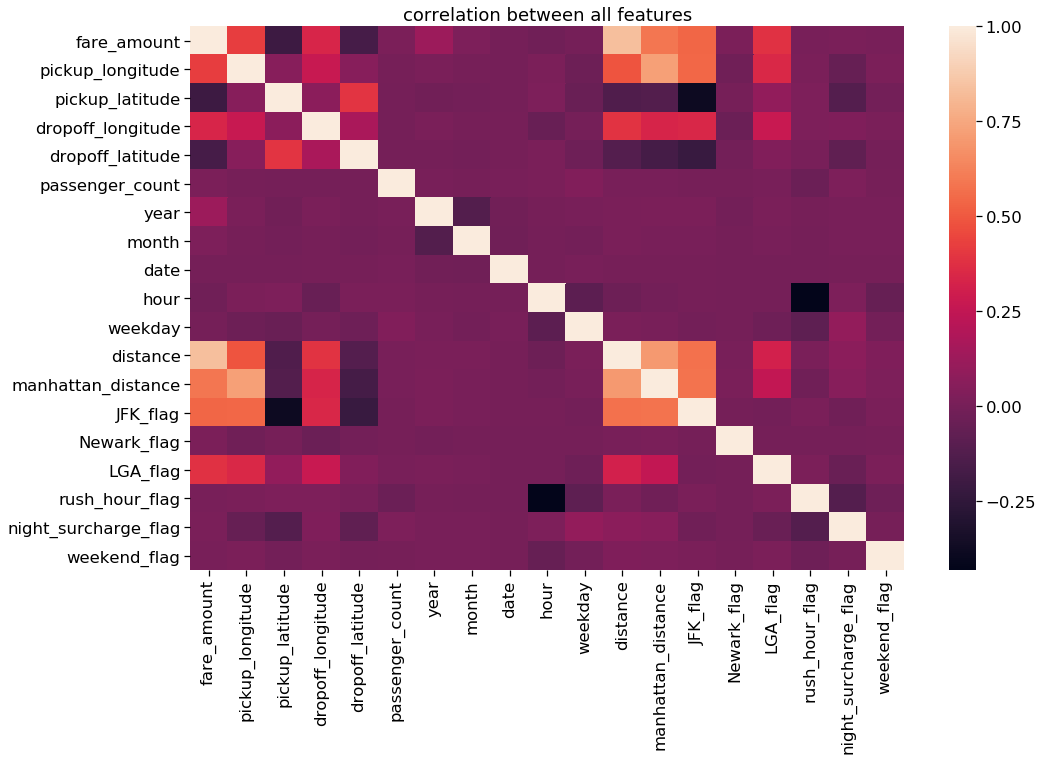

In [31]:
#finding correlations(dependence) between the variables
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix)
ax.set_title("correlation between all features")
figure = ax.get_figure()    
figure.savefig('heatmap.png')

In [32]:

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


# train data
df_x = train.loc[:, 'pickup_longitude':]
df_x = df_x.drop(columns = 'manhattan_distance')
df_y = train['fare_amount']

print(df_x.head(1))

# scaling the training data
scaler = preprocessing.StandardScaler().fit(df_x)
df_x = scaler.transform(df_x)

# test data
test_x = test.loc[:, 'pickup_longitude':]
test_x = test_x.drop(columns = 'manhattan_distance')

# scaling the testing data
test_x = scaler.transform(test_x)

# Create linear regression model
reg = linear_model.LinearRegression()

#spliting training, testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 3)

#cross validation
print('cross validation using shufflesplit')
cross_val_generator = ShuffleSplit()
print(cross_val_score(reg, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
reg.fit(x_train, y_train)

#printing coofficients
print('coofficients')
print (reg.coef_)

ans = reg.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)


# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0           -73.844           40.721            -73.842            40.712   

   passenger_count  year  month  date  hour  weekday  distance  JFK_flag  \
0                1  2009      6    15    17        0      0.63         0   

   Newark_flag  LGA_flag  rush_hour_flag  night_surcharge_flag  weekend_flag  
0            0         0               0                     0             1  
cross validation using shufflesplit


C:\Users\jsais\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jsais\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\jsais\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


[0.80882429 0.72829808 0.77296331 0.75950833 0.78794186 0.72288051
 0.7430524  0.71179155 0.81380024 0.70742266]
coofficients
[-5.62191580e-01 -4.83773750e-01 -1.50720689e-01 -3.05528499e-01
  6.38779944e-02  1.04286973e+00  2.63237355e-01 -1.71182722e-03
 -6.98565932e-03 -4.38992798e-02  6.98002656e+00  1.18393117e+00
  9.01590453e-02  1.70862175e+00 -1.08668468e-01 -4.11650948e-01
 -1.54661582e-01]
mean square error
21.716977416576082
root mean square error
4.660147789134598


0    10.573331
1    11.916910
2     6.181955
3     8.103699
4    14.012355
Name: fare_amount, dtype: float64

In [33]:
# Create lasso regression model
reg = linear_model.Lasso(alpha=0.1)

#cross validation
print('cross validation using shufflesplit')
cross_val_generator = ShuffleSplit()
print(cross_val_score(reg, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
reg.fit(x_train, y_train)

#printing coofficients
print('coofficients')
print (reg.coef_)

ans = reg.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)


# Make predictions using the testing set
pred_y = reg.predict(test_x)

# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()


cross validation using shufflesplit
[0.7242826  0.79064784 0.69721418 0.65708606 0.74845388 0.75630176
 0.76060926 0.79510549 0.79266028 0.81059093]
coofficients
[-0.20688606 -0.50856721 -0.         -0.30336463  0.          0.9314213
  0.15249821 -0.          0.         -0.          6.87899277  0.88875593
  0.02245973  1.47814734 -0.         -0.29683686 -0.04710078]
mean square error
22.04594367203668
root mean square error
4.695310817404603


0    10.436131
1    11.599135
2     6.040376
3     8.012662
4    13.960918
Name: fare_amount, dtype: float64

In [34]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Create Knearest Neighbor regression model
neighbors = KNeighborsRegressor(n_neighbors=10, n_jobs=7)

#cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(neighbors, x_train, y_train, cv = cross_val_generator))

# Train the model using the training sets
neighbors.fit(x_train,y_train)

ans = neighbors.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = neighbors.predict(test_x)

# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()

[0.75759673 0.80994582 0.79978254 0.83505184 0.81078406 0.76738264
 0.80333385 0.78021833 0.77518381 0.78396866]
mean square error
17.54902183325515
root mean square error
4.18915526487801


0    10.436131
1    11.599135
2     6.040376
3     8.012662
4    13.960918
Name: fare_amount, dtype: float64

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor


# Create random forest regression model
forest = RandomForestRegressor(n_estimators = 100, n_jobs=7)

# cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(forest, x_train, y_train, cv = cross_val_generator))
forest.fit(x_train,y_train)

ans = forest.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = forest.predict(test_x)

# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()

[0.84450744 0.89263431 0.85477746 0.87912955 0.86095416 0.84808882
 0.85560891 0.87649867 0.8874069  0.84909203]
mean square error
12.801720582641206
root mean square error
3.577949214653725


0    10.436131
1    11.599135
2     6.040376
3     8.012662
4    13.960918
Name: fare_amount, dtype: float64

In [51]:
import xgboost as xgb

#Creating XGB regressor
XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.09, subsample=0.75, max_depth=6, n_jobs = 7)

#cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(XGB, x_train, y_train, cv = cross_val_generator))
XGB.fit(x_train,y_train)

ans = XGB.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)
# root mean square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = XGB.predict(test_x)

# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()

C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:38:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:38:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:38:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:38:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:39:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.84048311 0.86417825 0.86065105 0.87091563 0.87197161 0.85583163
 0.86946681 0.8585603  0.83923743 0.88774413]
[21:39:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\nagaa\.conda\envs\cmpe256\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


mean square error
12.314762002680588
root mean square error
3.509239519138098
                           key  fare_amount
0  2015-01-27 13:08:24.0000002    10.960192
1  2015-01-27 13:08:24.0000003    11.189147
2  2011-10-08 11:53:44.0000002     4.713634
3  2012-12-01 21:12:12.0000002     8.544592
4  2012-12-01 21:12:12.0000003    15.687706


In [36]:
#LGBM
import lightgbm as lgbm

# creating LGBM regressor
LGBM = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.3, subsample=0.75, n_jobs = 7)

# cross validation
cross_val_generator = ShuffleSplit()
print(cross_val_score(LGBM, x_train, y_train, cv = cross_val_generator))
LGBM.fit(x_train,y_train)

ans = LGBM.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)

# Make predictions using the testing set
pred_y = LGBM.predict(test_x)

# Make predictions using the testing set
pred_y = reg.predict(test_x)
pred_y = pd.Series(pred_y, name = 'fare_amount')
pred_y.head()

[0.85761392 0.80807809 0.8670414  0.89260926 0.87019386 0.84950487
 0.84897325 0.85178082 0.82344419 0.860976  ]
mean square error
11.628937371940241
root mean square error
3.4101227795990336


0    10.436131
1    11.599135
2     6.040376
3     8.012662
4    13.960918
Name: fare_amount, dtype: float64